In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("diabetes.csv")

In [62]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
#Descripción general de dataset, dimensiones, columnas, tipos de datos, valores nulos que tenga.
#histograms
#Correlación entre variables.
#Distribución de las clases
#hacer una partición del dataset en train y test

# Descripción general de dataset, dimensiones, columnas, tipos de datos, valores nulos.

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* DIMENSIONES DEL DATASET

In [79]:
df.shape

(768, 9)

* DATOS DEL DATASET AGRUPADOS POR LA EDAD

In [63]:
def agrupar_edad(edad):
    if (edad<18):
        return "Menor de edad"
    elif (edad<30):
        return "Adulto Joven"
    elif (edad<65):
        return "Adulto"
    else: 
        return "Adulto Mayor"
    

In [64]:
df["AgeClass"] = df["Age"].apply(agrupar_edad)


In [65]:
df.groupby("AgeClass").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
AgeClass,,,,,,,,,
Adulto,5.946629,128.120787,73.025281,19.640449,78.106742,32.855899,0.496149,41.606742,0.505618
Adulto Joven,1.921717,113.744949,65.348485,21.949495,84.393939,31.390404,0.451048,24.313131,0.212121
Adulto Mayor,4.687500,137.062500,74.875000,5.500000,3.750000,27.687500,0.447313,68.062500,0.250000


In [78]:
valores = df.groupby("AgeClass").mean()["Age"]
print(valores)

AgeClass
Adulto          41.606742
Adulto Joven    24.313131
Adulto Mayor    68.062500
Name: Age, dtype: float64


In [80]:
categorias=["Adulto","Adulto Joven","Adulto Mayor"]

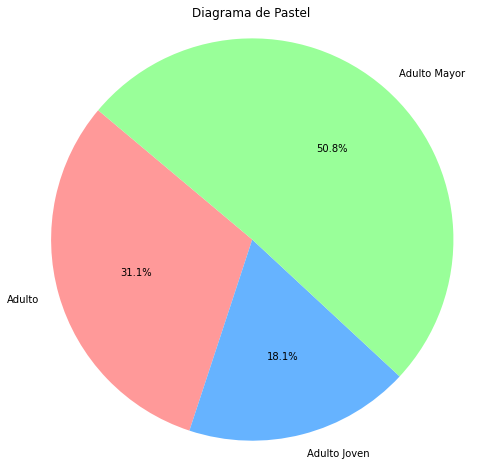

In [81]:

# Crear el diagrama de pastel
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(8, 8))  # Tamaño de la figura (opcional)
plt.pie(valores, labels=categorias, colors=colores, autopct='%1.1f%%', startangle=140)

# Configuraciones adicionales (opcional)
plt.axis('equal')  # Hace que el gráfico de pastel sea un círculo.

# Título del gráfico
plt.title('Diagrama de Pastel')

# Mostrar el gráfico
plt.show()

* CONTAR VALORES NULOS DEL DATAFRAME

In [83]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeClass                    0
dtype: int64

In [84]:
#tipo de datos
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
AgeClass                     object
dtype: object

# Gráfica de distribución de las variables. Histogramas

Text(0.5, 1.0, 'Histograma de Pregnancies')

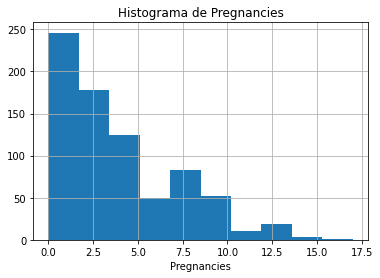

In [85]:
#Grafica interactiva
#%matplotlib notebook 

%matplotlib inline 
#grafica no interactiva. por defecto

#df["Pregnancies"].hist() #histograma
df["Pregnancies"].hist(bins=10) #histograma
#df["Pregnancies"].hist(bins=(0,3,6,9,12,15,18)) #histograma

plt.xlabel("Pregnancies")
# plt.ylabel("Count")
plt.title("Histograma de Pregnancies")

<AxesSubplot:>

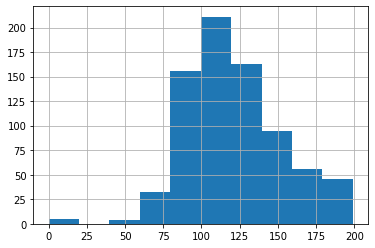

In [86]:
df["Glucose"].hist()

<AxesSubplot:>

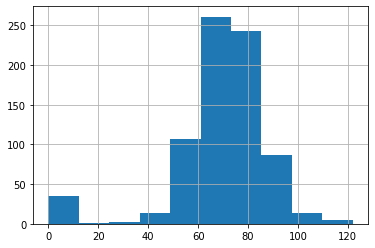

In [87]:
df["BloodPressure"].hist()

<AxesSubplot:>

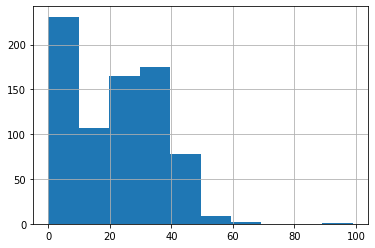

In [88]:
df["SkinThickness"].hist()

<AxesSubplot:>

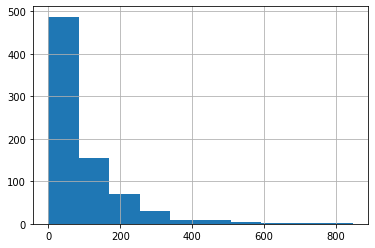

In [89]:
df["Insulin"].hist()

<AxesSubplot:>

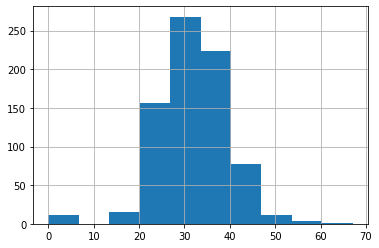

In [90]:
df["BMI"].hist()

<AxesSubplot:>

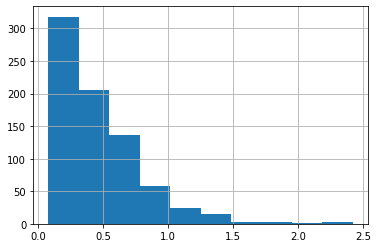

In [91]:
df["DiabetesPedigreeFunction"].hist()

<AxesSubplot:>

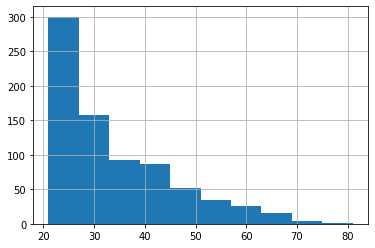

In [92]:
df["Age"].hist()

<AxesSubplot:>

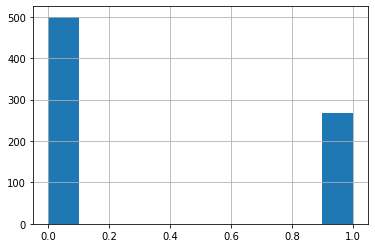

In [93]:
df["Outcome"].hist()


# Correlación entre variables.

correlacion: >0.7 o <-0.7  
no existe correlacion: <0.7 o >0.7

* GENERA UN ARRAY DE CORRELACION

In [94]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


* MAPA DE CALOR DE SEABORN

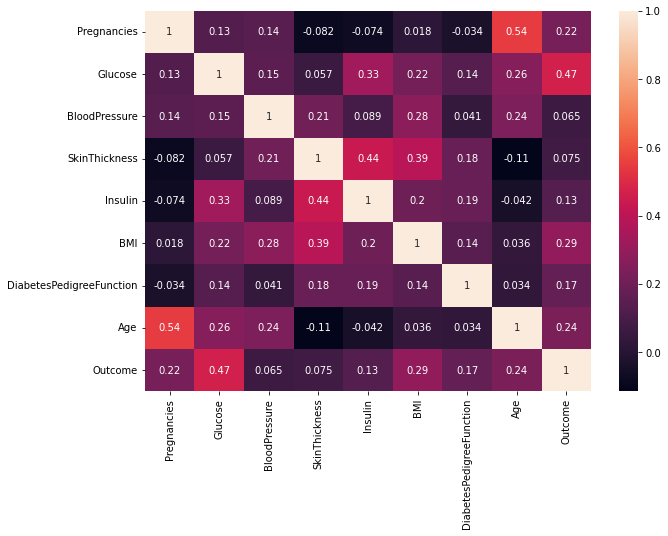

In [95]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:>

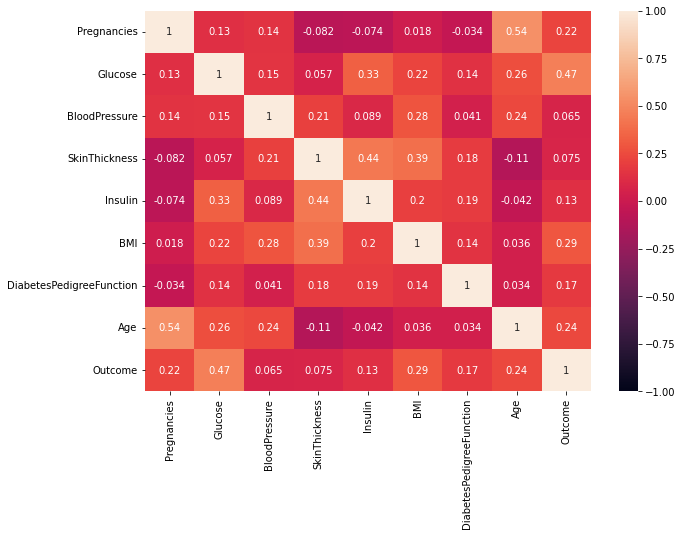

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [97]:
if "AgeClass" in df.columns:
    del df["AgeClass"]

# Distribución de las clases

In [98]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(data=df, x="SkinThickness", y="BMI", hue="Age")

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

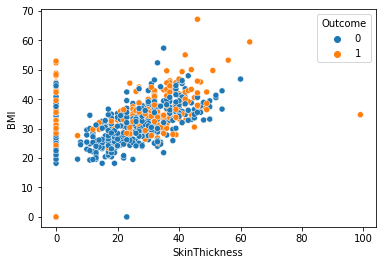

In [99]:
plt.figure(figsize=(6,4))
#sns.scatterplot("SkinThickness","BMI",data=df)

#Puedes usar el parametro hue para diferenciar por alguna clase cada punto.
sns.scatterplot("SkinThickness","BMI",hue="Outcome", data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

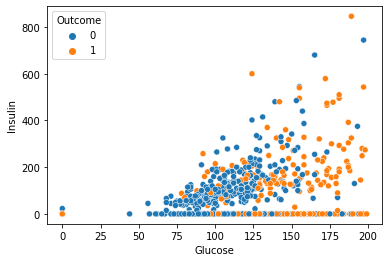

In [100]:
sns.scatterplot("Glucose","Insulin",hue="Outcome", data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

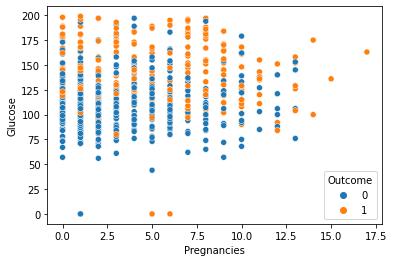

In [101]:
sns.scatterplot("Pregnancies","Glucose",hue="Outcome", data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='Age'>

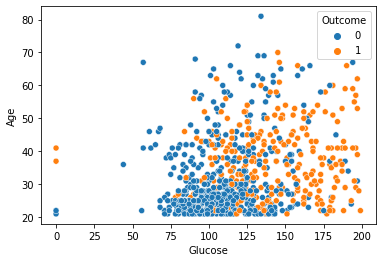

In [102]:
sns.scatterplot("Glucose","Age",hue="Outcome", data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

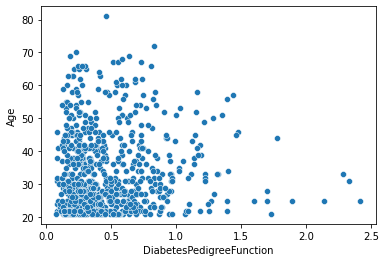

In [103]:
sns.scatterplot("DiabetesPedigreeFunction","Age",data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

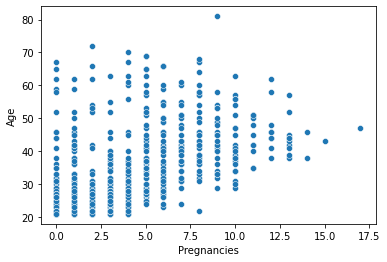

In [104]:
sns.scatterplot("Pregnancies","Age",data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='Age'>

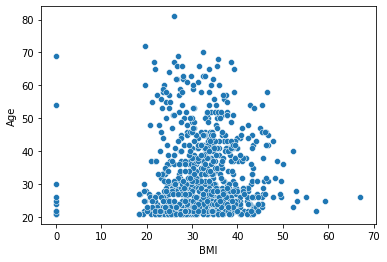

In [105]:
sns.scatterplot("BMI","Age",data=df)

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>

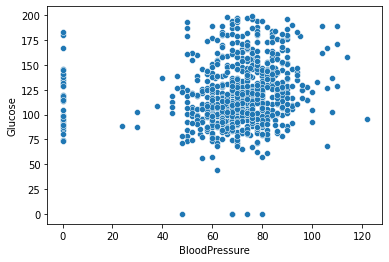

In [106]:
sns.scatterplot("BloodPressure","Glucose",data=df)

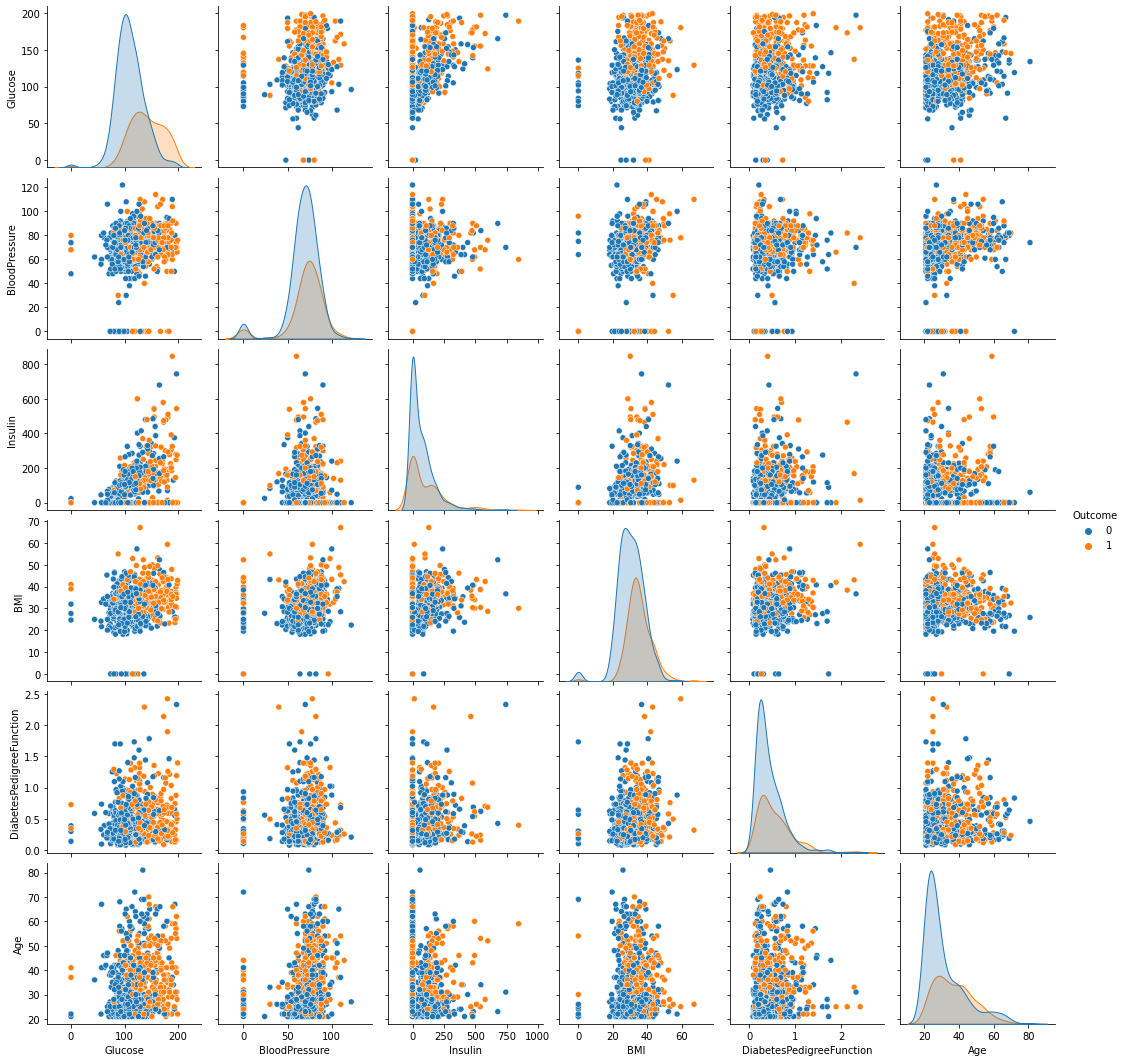

In [107]:
#sns.pairplot(df[["Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]])

sns.pairplot(df[["Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age", "Outcome"]], hue="Outcome")

In [108]:
#sns.pairplot(df[["Glucose","BloodPressure","BMI","Age", "Outcome"]], hue="Outcome") #4caracteristicas

# Partición del dataset en train y test

In [109]:
X = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] #features
y = df["Outcome"] #clases
#X

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [112]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [113]:
import math

In [114]:
total_size = len(df)
test_size = math.floor(0.30*total_size)
test = df.head(test_size)
train = df.tail(len(df) -test_size)

In [115]:
#train.to_csv('trainDiabetes.csv', index=False) # Agregar index=False
#test.to_csv('testDiabetes.csv', index=False) # Agregar index=False

In [116]:
#pd.read_csv('trainDiabetes.csv')

In [117]:
#pd.read_csv('testDiabetes.csv')

In [118]:
total_size = len(df)
test_size = math.floor(0.30*total_size)
train_size = total_size-test_size

In [119]:
test = df.sample(test_size)
# Idea: df - test = train
train = df.loc[list(set(df.index) -set(test.index))]

In [120]:
df.loc[[1,20,100]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
20,3,126,88,41,235,39.3,0.704,27,0
100,1,163,72,0,0,39.0,1.222,33,1


# REGRESION LOGISTICA



In [121]:
#Se divide el set de datos en dos sets: entrenamiento y prueba
print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


La regresión logística es una técnica de aprendizaje supervisado para clasificación, usada comunmente debido a su escalabilidad y explicabilidad.

Para clasificar problemas con dos posibles estados “SI/NO”

Se subdivide el conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento, lo que la maquina desconoce). Evitando fallas por “sobregeneralizar” el conocimiento.

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [123]:
#Se busca escalar los datos, esto se hace debido a que las características son completamente distintas en magnitudes, 
#unidades, por lo que es mejor escalarlos para llevarlos a un mismo nivel de magnitudes.
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
regresion_logistica = LogisticRegression() #crear una instancia de la reg. logistica
#regresion_logistica.fit(X,y) #Se entrena la regresión logística con los datos de entrenamiento

regresion_logistica.fit(X_train, y_train)

LogisticRegression()

* PREDICCIONES

In [124]:
y_pred = regresion_logistica.predict(X_test)#Realizo una predicción
prediccion = regresion_logistica.predict(X_test) #se usa el modelo entrenado para obtener predicciones con datos nuevos
prediccion

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_test) #probabilidades de la regresion
probabilidades_prediccion

array([[0.7307987 , 0.2692013 ],
       [0.81097359, 0.18902641],
       [0.87555806, 0.12444194],
       [0.84698458, 0.15301542],
       [0.49861363, 0.50138637],
       [0.54763701, 0.45236299],
       [0.98582843, 0.01417157],
       [0.40887364, 0.59112636],
       [0.44238344, 0.55761656],
       [0.20761835, 0.79238165],
       [0.76375041, 0.23624959],
       [0.09912363, 0.90087637],
       [0.60632647, 0.39367353],
       [0.72322898, 0.27677102],
       [0.93155393, 0.06844607],
       [0.65259883, 0.34740117],
       [0.86898666, 0.13101334],
       [0.92891976, 0.07108024],
       [0.14760639, 0.85239361],
       [0.40978586, 0.59021414],
       [0.78237245, 0.21762755],
       [0.92207166, 0.07792834],
       [0.51904285, 0.48095715],
       [0.90381724, 0.09618276],
       [0.44978932, 0.55021068],
       [0.11526396, 0.88473604],
       [0.88806384, 0.11193616],
       [0.96809666, 0.03190334],
       [0.71704173, 0.28295827],
       [0.88496057, 0.11503943],
       [0.

* STANDARIZAR

In [126]:
#X: features 
autoscaler = StandardScaler()
features = autoscaler.fit_transform(X)
features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

* MATRIZ CONFUSION

c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


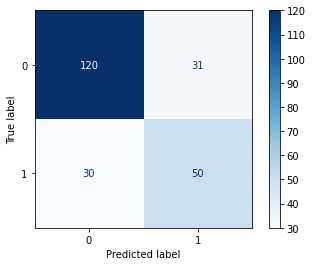

In [127]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(regresion_logistica, X_test, y_test,  cmap= "Blues")  
plt.show()

La matriz confusion, cuenta con 125 datos verdaderos positivos es decir datos reales (valor de 1) y 47 datos verdaderos negativos (valor de 0)

-----------------------------------------------------------------------------------------------------------------------
Ahora la cantidad de datos que el modelo no predijo correctamente. Comencemos con los datos falsos negativos, en total fueron 26 y en cuanto a los datos falsos positivos fue 33

Verdadero Positivo : TP -->120

Verdadero Negativo : TN -->50

Falso positivo : FP --> 31

Falso Negativo : FN --> 30

-----------------------------------------------------------------------------------------------------------------------

*Precision es una medida de certeza basada en una etiqueta predicha. Se define de esta forma: precision = TP / (TP + FP)

*Recall es un grado positivo verdadero. Se define de esta forma: Recall = TP / (TP + FN)

*F1 score: es el promedio armónico de la precisión y grado, donde un grado F1 alcanza la precision con el valor en 1 y el peor escenario en 0

* PRECISION DEL MODELO

In [128]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo: {:.2f} %'.format(precision*100))

Precisión del modelo: 61.73 %


* EXACTITUD DEL MODELO

In [129]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:{:.2f} %'.format(exactitud*100))

Exactitud del modelo:73.59 %


* RECALL

In [130]:
rc=recall_score(y_test, y_pred)
print("Recall es : {:.2f} %".format(rc*100))

Recall es : 62.50 %


# RANDOM FOREST

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #calcula accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


------------------------------------------------------------------------------------------------------------------

                                         Random Forest Classifier

------------------------------------------------------------------------------------------------------------------

Un RandomForestClassifier es un estimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap=True (predeterminado); de lo contrario, se usa todo el conjunto de datos para construir cada árbol.



------------------------------------------------------------------------------------------------------------------

                                         Grid Search (búsqueda en cuadrícula)

------------------------------------------------------------------------------------------------------------------
Random Search permite controlar el número de intentos de combinación de hiperparámetros y nos permite especificar el número de modelos a entrenar combinación de hiperparámetros.


A diferencia de Grid Search, donde se intentan todas las combinaciones posibles.


------------------------------------------------------------------------------------------------------------------

                                                 Randomized Search

------------------------------------------------------------------------------------------------------------------

RandomizedSearchCV implementa una optimizacion de parametros mediante una búsqueda de validación cruzada sobre la configuración de los parámetros. 

A diferencia de GridSearchCV, no se prueban todos los valores de los parámetros, sino que se muestrea un número fijo de configuraciones de parámetros de las distribuciones especificadas. 
Si todos los parámetros se presentan como una lista, se realiza un muestreo sin reemplazo. Si se da al menos un parámetro como distribución, se utiliza el muestreo con reemplazo. 

* RANDOM FOREST  CLASSIFIER

In [132]:
#Clasificador Gaussiano 
clf=RandomForestClassifier(n_estimators=1000)

#se entrena el modelo con  y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)

print("Precision: {:.2f} %".format(accuracy*100))

Precision: 75.76 %


In [133]:
n_estimators = [1000] # number of trees in the random forest,la busqueda se realiza entre: 1000 combinaciones
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [5,10,None] # maximum number of levels allowed in each decision tree
min_samples_split = [2,5] # minimum sample number to split a node
min_samples_leaf = [1,2] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


In [134]:

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


rfc=RandomForestClassifier()


* GRIDSEARCHCV

In [135]:
grid_search=GridSearchCV( estimator=rfc,
                         param_grid=param_grid,
                         cv=3,
                        n_jobs = -1,
                        verbose = 2,
                        return_train_score=False)



grid_search.fit(X_train, y_train)
print(grid_search.best_params_,grid_search.best_score_, grid_search.scoring)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000} 0.7877094972067039 None


* RANDOMIZEDSEARCHCV

In [63]:
rs=RandomizedSearchCV(estimator=rfc,
                         param_distributions=param_grid,
                         cv=3,
                        n_jobs = -1,
                        verbose = 2)


rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\users\majo_\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

* REVISANDO LA PRECISION

In [72]:
print(" Train Accuracy: {:.2f} %".format(grid_search.score(X_train,y_train)*100))
print(" Test Accuracy: {:.2f} %".format(grid_search.score(X_test,y_test)*100))

 Train Accuracy: 100.00 %
 Test Accuracy: 74.03 %


In [73]:
print(" Train Accuracy: {:.2f} %".format(rs.score(X_train,y_train)*100))
print(" Test Accuracy: {:.2f} %".format(rs.score(X_test,y_test)*100))

 Train Accuracy: 100.00 %
 Test Accuracy: 74.03 %
